<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/Tensorflow_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-05-06 11:26:09--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-05-06 11:26:10 (16.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
#load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X =  data[:,0].reshape(-1, 1) # making an N X D matrix
Y= data[:,1]

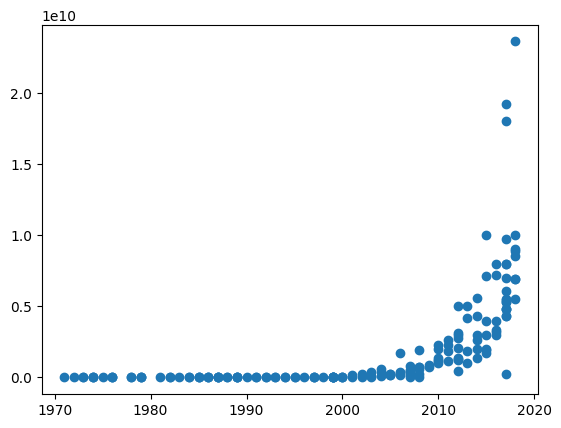

In [7]:
#plot the data
plt.scatter(X, Y);

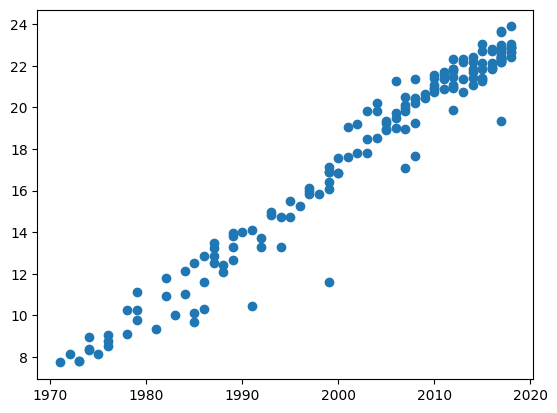

In [8]:
Y = np.log(Y)
plt.scatter(X, Y);

In [9]:
X = X - X.mean()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [12]:
def schedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  else:
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)



In [13]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 18ms/step - loss: 377.7544 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 14ms/step - loss: 294.9416 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 243.8746 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 191.4320 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 303.4981 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 272.5026 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 263.9352 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 175.1923 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 187.2276 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 138.1425 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 7ms/step -

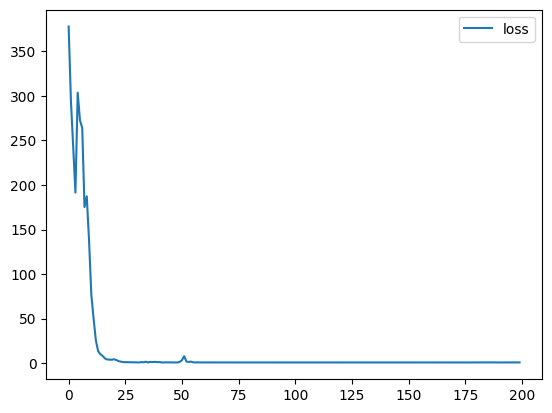

In [14]:
#plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();


In [15]:
model.layers

In [16]:
model.layers[0].get_weights()

[array([[0.3460628]], dtype=float32), array([17.757654], dtype=float32)]

In [17]:
a = model.layers[0].get_weights()[0][0,0]

In [18]:
a

0.3460628

In [19]:
print("Time to double:", np.log(2) / a)

Time to double: 2.002951955757475


In [20]:
X = X.flatten()  # Call the flatten method on X and assign the result back to X
X = np.array(X).flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)


0.341682487387313 17.764939393631764


In [21]:
X = np.array(X).flatten()

X = X.flatten()  # Call the flatten method on X and assign the result back to X



In [22]:
X = np.array(X)
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)

0.341682487387313 17.764939393631764


6/6 [==============================] - 0s 2ms/step


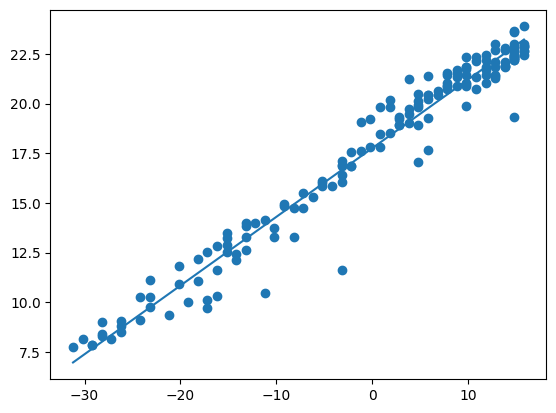

In [23]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [24]:
#Manual calculation
#Get the weights
w, b = model.layers[0] . get_weights()

#Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N X 1) X (1 X 1) + (1) --> (N  x 1)
Yhat2 = (X.dot(w) + b). flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True